# Desafio Final - Módulo 5

#### Objetivo:
Exercitar os seguintes conceitos trabalhados no Módulo:

* Pré-processamento dos dados.
* Detecção de anomalias.
* Processamento dos dados.
* Correlações.
* Redução da dimensionalidade.
* Algoritmos supervisionados e não supervisionados

Para as questões que envolvem a construção de modelos supervisionados, você
deve utilizar o dataset original para definir a eficiência dos veículos. Além disso, deve
utilizar as variáveis **['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'timeto-60']** como entrada. A saída deve ser a classificação de eficiência do veículo.

Para a implementação dos algoritmos, utilize as definições abaixo:

* normaliza = StandardScaler() #objeto para a normalização
* pca = PCA(n_components=7)
* KMeans(n_clusters=3,random_state=42)
* train_test_split(entradas_arvore, saidas_arvore, test_size=0.30,random_state=42)
* DecisionTreeClassifier(random_state=42)
* LogisticRegression(random_state=42)

###### import

In [1]:
import pandas as pd
import numpy as np

#Visualização
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

###### carregando base

In [2]:
# Importando o dataset
df = pd.read_csv('cars.csv')
df.head(3)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.


In [3]:
print(df.shape[0], 'instâncias')
print(df.shape[1], 'features/atributos')

261 instâncias
8 features/atributos


###### verificando nulos

In [4]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

###### Tipos das variáveis

In [5]:
df.dtypes

mpg            float64
cylinders        int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand           object
dtype: object

###### Describe

In [6]:
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


###### Olhando quando classes temos, e a quantidade dentro de cada classe

Quantidade:
 US.        162
 Japan.      51
 Europe.     48
Name: brand, dtype: int64


Distribuição percentual:
 US.        0.620690
 Japan.     0.195402
 Europe.    0.183908
Name: brand, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


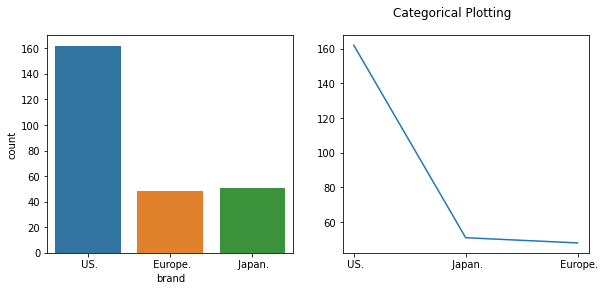

In [7]:
print('Quantidade:')
print(df['brand'].value_counts())

print('\n\nDistribuição percentual:')
print(df['brand'].value_counts(normalize = True))

#Visualizando
plt.figure(figsize=(15, 4))

plt.subplot(131)
sns.countplot(df['brand'])
plt.subplot(132)
plt.plot(df['brand'].value_counts())
plt.suptitle('Categorical Plotting')
plt.show()

É possivel observar que os dados estão desbalanceados. Temos uma maior quantidade de "brand = US.', totalizando cerca de 62%.

### Para Perguntas

#### Pergunta  2

In [8]:
cols = ['cubicinches', 'weightlbs']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df[cols].isnull().sum()

cubicinches    2
weightlbs      3
dtype: int64

In [9]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

#### Pergunta  3

In [10]:
col = ['cubicinches']
df[col] = df[col].apply(pd.to_numeric, errors='coerce', axis=1)
df_p3 = df[col]
df_p3[df_p3.cubicinches.isnull()]

,cubicinches
40,NaN
180,NaN


#### Pergunta  4

In [11]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

#### Pergunta  5

In [12]:
cols = ['weightlbs']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_p5 = df[cols]
         
print('Média com nulos:\n', df_p5.mean())

print('\nRetirando nulos ...')
df_p5.fillna(df_p5.mean(), inplace=True)

print('\nConferindo se ainda existem nulos ...')
print(df_p5.isnull().sum())

print('\nMédia sem nulos:\n', df_p5.mean())

Média com nulos:
 weightlbs    3009.833333
dtype: float64

Retirando nulos ...

Conferindo se ainda existem nulos ...
weightlbs    0
dtype: int64

Média sem nulos:
 weightlbs    3009.833333
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


#### Pergunta  6

In [13]:
cols = ['mpg', 'cylinders','hp', 'time-to-60', 'year']
df_p6 = df[cols]

df_p6 = df[cols]
df_p6.fillna(df_p6.mean(), inplace=True)

print('Mediana:', np.median(df_p6.mpg))

Mediana: 22.0


#### Pergunta  7

In [14]:
df_p7 = df['time-to-60']
df_p7.describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

**25% dos dados são menores que o valor de 14,00.**

**75% dos dados são maiores que o valor de 14,00.**

#### Pergunta  8

In [15]:
corr = df[['cylinders', 'mpg']].corr(method='pearson')
corr

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


Inversamente proporcionais

#### Pergunta  9

<AxesSubplot:xlabel='hp'>

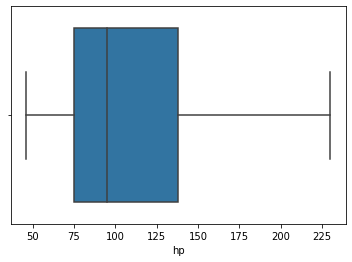

In [16]:
sns.boxplot(x=df['hp'])

#### Pergunta  10

In [17]:
scaler = StandardScaler()
scaler_hp = scaler.fit_transform(df[['hp']])
scaler_hp.max()

3.05870398977614

In [18]:
from sklearn.preprocessing import StandardScaler

print(cols, ' to numeric ...')
cols = ['cubicinches', 'weightlbs']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

print('\nRetirando nulos ...')
df.fillna(df.mean(), inplace=True)


print('\nSubstituindo nulos pela média ...')
df.fillna(df[cols].mean(), inplace=True)

scaler = StandardScaler()
scaled = scaler.fit_transform(df.iloc[:,:-1])
scaled

['mpg', 'cylinders', 'hp', 'time-to-60', 'year']  to numeric ...

Retirando nulos ...

Substituindo nulos pela média ...


array([[-1.17112732,  1.39305285,  1.37239295, ...,  1.41499703,
        -1.22128734, -1.32753906],
       [ 1.12122635, -0.91910482, -1.03028992, ..., -1.28008557,
        -0.53282946,  0.8758803 ],
       [-0.78693397,  1.39305285,  0.93052024, ...,  0.51820947,
        -1.56551627, -1.60296648],
       ...,
       [-0.14661172,  0.23697401,  0.28612253, ..., -0.20630047,
        -0.18860053,  1.70216257],
       [-0.65886952,  0.23697401,  0.28612253, ...,  0.32823211,
         0.15562841, -1.32753906],
       [-0.14661172,  0.23697401,  0.4518248 , ...,  0.40493105,
        -0.18860053,  0.04959804]])

In [19]:
#to dataframe
df_scaled = pd.DataFrame(scaled)
print(df_scaled)

            0         1         2         3         4         5         6
0   -1.171127  1.393053  1.372393  1.450681  1.414997 -1.221287 -1.327539
1    1.121226 -0.919105 -1.030290 -0.874768 -1.280086 -0.532829  0.875880
2   -0.786934  1.393053  0.930520  0.832210  0.518209 -1.565516 -1.602966
3   -1.043063  1.393053  1.832677  1.079598  0.886364 -1.909745 -1.602966
4    0.941936 -0.919105 -0.947439 -1.072679 -1.131408  0.499857  0.325025
..        ...       ...       ...       ...       ...       ...       ...
256 -0.786934  1.393053  0.958137  0.584822  0.979583 -0.188601  0.875880
257  1.659097 -0.919105 -1.011879 -1.146896 -1.427584  0.155628  0.600453
258 -0.146612  0.236974  0.286123  0.139523 -0.206300 -0.188601  1.702163
259 -0.658870  0.236974  0.286123 -0.157343  0.328232  0.155628 -1.327539
260 -0.146612  0.236974  0.451825 -0.033649  0.404931 -0.188601  0.049598

[261 rows x 7 columns]


In [20]:
df_scaled.rename(columns = {0:'cubicinches', 1:'weightlbs', 2:'mpg', 3:'cylinders', 4:'hp', 5:'time-to-60', 6:'year'},
                inplace = True)
df_scaled.describe()

,cubicinches,weightlbs,mpg,cylinders,hp,time-to-60,year
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,3.143505e-16,2.124737e-16,-1.203805e-16,9.831429e-17,-1.648320e-16,-2.043916e-16,-2.605329e-15
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00
min,-1.683385e+00,-1.497144e+00,-1.223609e+00,-1.493239e+00,-1.648240e+00,-2.598203e+00,-1.602966e+00
25%,-7.997404e-01,-9.191048e-01,-9.198217e-01,-7.758132e-01,-8.918710e-01,-5.328295e-01,-7.766842e-01
50%,-1.466117e-01,2.369740e-01,-4.135093e-01,-2.810368e-01,-1.248816e-01,1.556284e-01,4.959804e-02
75%,7.242265e-01,1.393053e+00,9.305202e-01,7.827325e-01,7.719060e-01,4.998573e-01,8.758803e-01
max,3.003774e+00,1.393053e+00,2.338990e+00,3.058704e+00,2.344824e+00,3.253689e+00,1.702163e+00


In [21]:
cols = ['hp']
df_scaled[cols].describe()

,hp
count,2.610000e+02
mean,-1.648320e-16
std,1.001921e+00
min,-1.648240e+00
25%,-8.918710e-01
50%,-1.248816e-01
75%,7.719060e-01
max,2.344824e+00


#### Pergunta  11

In [22]:
pca = PCA(n_components=7)

In [23]:
pca.fit(df_scaled)
print(pca.explained_variance_ratio_[0])

0.7237134885896339


#### Pergunta  12

In [24]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

In [25]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [26]:
df['kmeans'] = kmeans.labels_
df['kmeans'].value_counts()

2    109
0     77
1     75
Name: kmeans, dtype: int64

INCORRETO: Todos os clusters possuem a mesma quantidade de elementos.

#### Pergunta  13

In [27]:
df['efficiency'] = df['mpg'] > 25

In [28]:
X = df[['cylinders','cubicinches','hp','weightlbs','time-to-60']]
y = df['efficiency'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [37]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.80      0.87        41
        True       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



In [38]:
print('Acurácia: ',accuracy_score(y_test, y_pred))

Acurácia:  0.8734177215189873


#### Pergunta  14

In [39]:
print(confusion_matrix(y_test, y_pred))

[[33  8]
 [ 2 36]]


<AxesSubplot:>

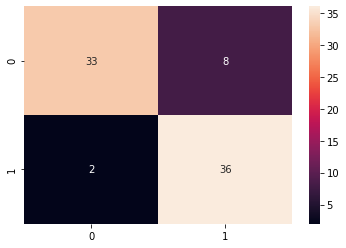

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

INCORRETO: Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes.

#### Pergunta  15

In [41]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.88      0.87        41
        True       0.86      0.84      0.85        38

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:>

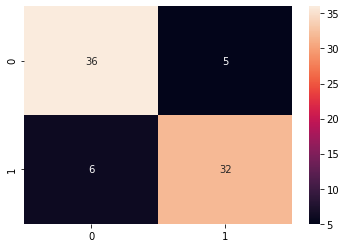

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)